# Operation

In [45]:
class Operation():
    def __init__(self, input_nodes=[]):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
    
    def compute(self):
        pass

In [46]:
class add(Operation):
    
    def __init__(self,x,y):
        
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var + y_var

In [47]:
class multiply(Operation):
    
    def __init__(self,x,y):
        
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var * y_var

In [48]:
class matmul(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var.dot(y_var)

In [49]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        _default_graph.placeholders.append(self)

In [50]:
class Variable():
    
    def __init__(self,initial_value=None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [51]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders =[]
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph=self

x = Ax +b

A=10

b=1

z = 10x + 1

In [8]:
g = Graph()

In [9]:
g.set_as_default()

In [10]:
A=Variable(10)

In [11]:
b=Variable(1)

In [12]:
 x = Placeholder()

In [13]:
y = multiply(A,x)

In [14]:
z = add(y,b)

In [52]:
def traverse_postorder(operation):
    
    nodes_postorder=[]
    def recurse(node):
        if isinstance(node,Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
        
    recurse(operation)
    return nodes_postorder

In [53]:
class Session():
    
    def run(self, operation, feed_dict={}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            
            elif type(node) == Variable:
                
                node.output = node.value
                
            else:
                
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

In [21]:
sess = Session()

In [22]:
result = sess.run(operation=z,feed_dict={x:10})

In [23]:
print(result)

101


In [29]:
g = Graph()
g.set_as_default()
A = Variable([[10,20],[30,40]])
b = Variable([1,2,])

x = Placeholder()

y = matmul(A,x)

z=add(y,b)

In [28]:
sess=Session()

In [34]:
import numpy as np
sess.run(operation=z, feed_dict={x:10})

array([[101, 202],
       [301, 402]])

In [55]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [56]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
sample_z = np.linspace(-10,10,100)

In [9]:
sample_a = sigmoid (sample_z)

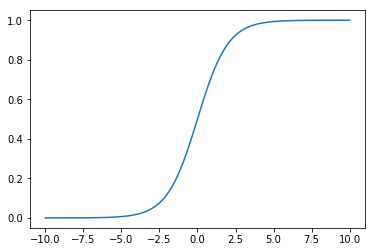

In [10]:
plt.plot(sample_z, sample_a)

In [63]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        super().__init__([z])
        
    def compute(self, z_val):
        return 1/(1+np.exp(-z_val))

In [21]:
from sklearn.datasets import make_blobs

In [22]:
data = make_blobs(n_samples = 50, n_features =2, centers =2, random_state=75)

In [23]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [24]:
type(data)

tuple

In [31]:
features = data[0]

In [26]:
labels = data[1]

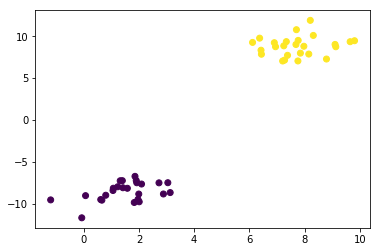

In [28]:
plt.scatter(features[:,0],features[:,1],c=labels)

In [37]:
x = np.linspace(0,11,10)
y= -x + 5

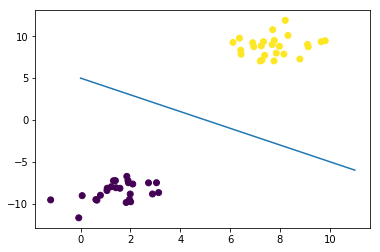

In [38]:
plt.scatter(features[:,0],features[:,1],c=labels)
plt.plot(x,y)

###(1,1)*features -5 = 0

In [40]:
np.array([1,1]).dot(np.array([[8],[10]]))-5

array([13])

In [41]:
np.array([1,1]).dot(np.array([[2],[-10]]))-5

array([-13])

In [64]:
#Basic Neural Network
g = Graph()
g.set_as_default()
x = Placeholder()
w = Variable([1,1])
b = Variable(-5)
z = add(matmul(w,x),b)
a = Sigmoid(z)

In [58]:
sess=Session()

In [70]:
sess.run(operation=a, feed_dict={x:[8,10]})

0.999997739675702

In [71]:
sess.run(operation=a, feed_dict={x:[[2],[-10]]})

array([2.2603243e-06])